In [1]:
from matplotlib import pyplot as plt
import scipy.interpolate
import numpy as np
Point = lambda x, y : array([x,y])

In [2]:
L = 40    # length
W = 25    # width
T = 0.025   # depth
A = L*W     # area
l = 2*W+2*L # perimeter
h = 0.003   # height between ground and skirt

g = 9.8     # grav. const.
ρ = 1.18    # air density [kg/m^3]

#Δp_f = 0.0514849125e3  # fan at 12V [Pa]
#Q  = 0.075         # fan at 12V [m^3/s]


Δp_f = 0.0661948875e3 # fan at 14V [Pa]

components = [
    ("Thrust Fan",    38.2,  W/2,       0.19777), #AFB1212SH
    ("Servo",         37.15,  W/2,       0.043),   #HS-422
    ("Battery Left",  0,  W/2-3.25,  0.045),   
    ("Battery Right", 0,  W/2+3.25,  0.045),   #AFB1212SH
    ("Lift Fan",      L/2,   W/2,       0.19777),
    ("Controller",    3.8, W/2,       0.148),
    #("Sensor", )
    #("Base", )
    #("Skirt",
]

m = sum(e[3] for e in components)
centre = (sum(e[1]*e[3] for e in components)/m, sum(e[2]*e[3] for e in components)/m)
print(f"Center of gravity = {centre} cm \t Mass = {MASS} kg")


NameError: name 'MASS' is not defined

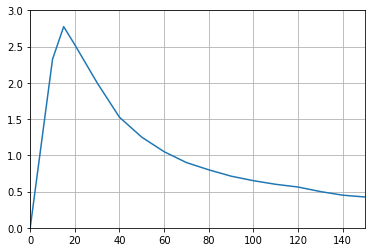

In [165]:
sensor_points = [
    (0, 0),
    (10,  2.0+13/20*0.5), 
    (15,  2.5+11/20*0.5),
    (20,  2.5+ 1/20*0.5),
    (30,  2.0),
    (40,  1.5+1/20*0.5),
    (50,  1.0+10/20*0.5),
    (60,  1.0+2/20*0.5),
    (70,  0.5+16/20*0.5),
    (80,  0.5+12/20*0.5),
    (90,  0.5+8.5/20*0.5),
    (100, 0.5+6/20*0.5),
    (110, 0.5+4/20*0.5),
    (120, 0.5+2.5/20*0.5),
    (130, 0.5),
    (140, 0.0+18/20*0.5),
    (150, 0.0+17/20*0.5),
    #(300, 0.0+15/20*0.5)
]

x, y = zip(*sensor_points)
plt.plot(x, y)
plt.grid(True) 
plt.axis([0, 150, 0, 3]) 
plt.show()

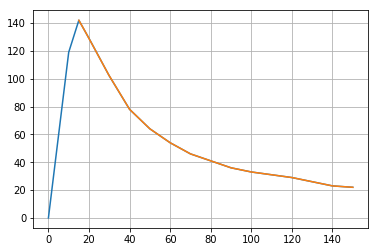

In [167]:
v_ref = 5 # volts
resolution = 8 # bits
fv = scipy.interpolate.interp1d(y, x)
ysc = np.round(np.array(y) / 5 * (2**resolution-1))
f = scipy.interpolate.interp1d(ysc[2:], x[2:])

result = []
for vsc in range(0, 2**resolution):
    try : point = (f(vsc), vsc)
    except: point = (float('nan'), vsc)
    result = result + [point]

x2, y2 = zip(*result)
plt.plot(x,ysc)
plt.plot(x2,y2)
plt.grid(True)
#plt.axis([0, 150, 0, 255])
plt.show()
    
    

In [168]:
for e in result:
    cm = int(np.around(e[0])) if not np.isnan(e[0]) else e[0]
    vsc = e[1]
    v = np.around(e[1] * v_ref / (2**resolution-1),1)
    print(f"/*{vsc}*/ {cm}", end=', ')

/*0*/ nan, /*1*/ nan, /*2*/ nan, /*3*/ nan, /*4*/ nan, /*5*/ nan, /*6*/ nan, /*7*/ nan, /*8*/ nan, /*9*/ nan, /*10*/ nan, /*11*/ nan, /*12*/ nan, /*13*/ nan, /*14*/ nan, /*15*/ nan, /*16*/ nan, /*17*/ nan, /*18*/ nan, /*19*/ nan, /*20*/ nan, /*21*/ nan, /*22*/ 150, /*23*/ 140, /*24*/ 137, /*25*/ 133, /*26*/ 130, /*27*/ 127, /*28*/ 123, /*29*/ 120, /*30*/ 115, /*31*/ 110, /*32*/ 105, /*33*/ 100, /*34*/ 97, /*35*/ 93, /*36*/ 90, /*37*/ 88, /*38*/ 86, /*39*/ 84, /*40*/ 82, /*41*/ 80, /*42*/ 78, /*43*/ 76, /*44*/ 74, /*45*/ 72, /*46*/ 70, /*47*/ 69, /*48*/ 68, /*49*/ 66, /*50*/ 65, /*51*/ 64, /*52*/ 62, /*53*/ 61, /*54*/ 60, /*55*/ 59, /*56*/ 58, /*57*/ 57, /*58*/ 56, /*59*/ 55, /*60*/ 54, /*61*/ 53, /*62*/ 52, /*63*/ 51, /*64*/ 50, /*65*/ 49, /*66*/ 49, /*67*/ 48, /*68*/ 47, /*69*/ 46, /*70*/ 46, /*71*/ 45, /*72*/ 44, /*73*/ 44, /*74*/ 43, /*75*/ 42, /*76*/ 41, /*77*/ 41, /*78*/ 40, /*79*/ 40, /*80*/ 39, /*81*/ 39, /*82*/ 38, /*83*/ 38, /*84*/ 38, /*85*/ 37, /*86*/ 37, /*87*/ 36, /*88*/ 3